In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Define sigmoid and derivative of sigmoid

In [30]:
def sigmoid(x, deriv=False):
    """Compute sigmoid function and its derivative."""
    if not deriv:
        return 1/(1+np.exp(-x))
    else:
        return 1/(1+np.exp(-x))*(1-1/(1+np.exp(-x)))
def show_sigmoid(x, deriv=False):
    """Plot sigmoid function and its derivative."""
    if not deriv:
        plt.plot(x, 1/(1+np.exp(-x)), label='sig')
    else:
        plt.plot(x, 1/(1+np.exp(-x))*(1-1/(1+np.exp(-x))), label='deriv of sig')

In [17]:
x = np.linspace(-10,10,50)

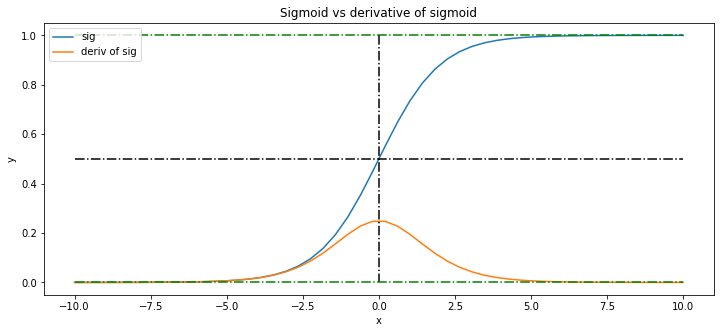

In [29]:
plt.figure(figsize=(12,5))
plt.title('Sigmoid vs derivative of sigmoid')
plt.xlabel('x')
plt.ylabel('y')
show_sigmoid(x)
show_sigmoid(x, True)
plt.plot([0, 0], [1, 0], 'k-.')
plt.plot([-10, 10], [0, 0], 'g-.')
plt.plot([-10, 10], [1, 1], 'g-.')
plt.plot([-10, 10], [0.5, 0.5], 'k-.')
plt.legend()

In [382]:
class neural_net():
    """Creates and initialize neural network."""
    def __init__(self, input_shape = (2, 4), n_layers = 2, n_neurons_each_layer = (3,2), debug=False):
        if n_layers != len(n_neurons_each_layer):
            print("""Error!
Length of n_neurons_each_layer variable should be the same as n_layers variable number.
Example:
Define Neural Network with 2 hidden layers and output layer: n_layers = 3
Define the number of neurons in each layer:
Hidden layer 1: 4
Hidden layer 2: 3
Output layer: 2
n_neurons_each_layer = (4,3,2)""")
        self.debug = debug
        self.n_features = input_shape[0] # takes number os features (number of input columns)
        self.n_examples = input_shape[1] # takes number of examples (number of input rows)
        self.n_layers = n_layers
        self.n_neurons_each_layer = n_neurons_each_layer
        self.weights_per_layer = list()
        self.initiate_weights()
        self.z_per_layer = list()
        self.a_per_layer = list()
        self.initiate_z()
        self.initiate_a()
        self.error = list()
        self.deriv = list()
        
        self.debug_nn()
        
    def debug_nn(self):
        """Only for debug purposes, shows weights..."""
        if self.debug:
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("These are weights randomly initiated per layer:")
            print()
            for i, val in enumerate(self.weights_per_layer):
                print("Weights between layers: {} - {}".format(i, i+1))
                print(val)
                print()
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("Z values per layer:")
            print()
            for i, val in enumerate(self.z_per_layer):
                print("Z values at layer: {}".format(i+1))
                print(val)
                print()
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("A values per layer:")
            print()
            for i, val in enumerate(self.a_per_layer):
                print("A values at layer: {}".format(i+1))
                print(val)
                print()
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        
    def initiate_weights(self):
        """Randomly initiate neural networks weights."""
        for i in range(self.n_layers):
            if i == 0:
                self.weights_per_layer.append(np.random.rand(self.n_features, self.n_neurons_each_layer[i]))
            else:
                self.weights_per_layer.append(np.random.rand(self.n_neurons_each_layer[i-1], self.n_neurons_each_layer[i]))
                
    def initiate_z(self):
        """Initiate neural networks Z function matrices. (it is not necessary)"""
        for i in range(self.n_layers):
            self.z_per_layer.append(np.zeros((self.n_examples, self.weights_per_layer[i].shape[1])))
            
    def initiate_a(self):
        """Initiate neural networks activation matrices. (it is not necessary)"""
        for i in range(self.n_layers):
            self.a_per_layer.append(np.zeros((self.n_examples, self.weights_per_layer[i].shape[1])))

    def sigmoid(self, X, deriv=False):
        """Compute sigmoid function and its derivative."""
        if not deriv:
            return 1/(1+np.exp(-X))
        else:
            return 1/(1+np.exp(-X))*(1-1/(1+np.exp(-X)))
            
    def mse(self, Y, deriv=False):
        """Compute Mean Squere Error and its derivative"""
        if not deriv:
            return np.sum(np.sum((Y-self.a_per_layer[-1])**2, axis=1))/(2*self.n_examples)
        else:
            return -(Y-self.a_per_layer[-1])/self.n_examples
            
    def train(self, X, Y, n_epochs = 10, lr = 0.1):
        """Training method.
        1. Forward propagation.
        2. Compute MSE.
        3. Compute gradients per weight matrices.
        4. Update weight matrices with respect to gradient and learning rate.
        5. Forward propagate and see MSE result after weights adjustment."""
        for epoch in range(n_epochs):
            for i in range(self.n_layers): # forward propagation
                if i == 0:
                    self.z_per_layer[i] = np.dot(X, self.weights_per_layer[i]) # compute first layer z functions matrix
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i]) # compute first layer a functions matrix
                else:
                    # compute the rest of the z and a functions matrices in next layers
                    self.z_per_layer[i] = np.dot(self.a_per_layer[i-1], self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
            print("Loss: {}".format(self.mse(Y)))
            # compute gradient and start bacpropagation
            # start from the last layer, compute deltas (errors) for each layer
            for i in range(self.n_layers):
                if i == 0:
                    # elementwise multiplication (hadamard product)
                    self.error.append(np.multiply(self.mse(Y, deriv=True), self.sigmoid(self.z_per_layer[-(i+1)], deriv=True)))
                else:
                    self.error.append(np.dot(self.error[-1], self.weights_per_layer[-i].T) * self.sigmoid(self.z_per_layer[-(i+1)], deriv=True))
            # compute gradient for each layer of weights
            for i in range(len(self.error)):
                if i == len(self.error)-1:
                    self.deriv.append(np.dot(X.T, self.error[i]))
                else:
                    self.deriv.append(np.dot(self.a_per_layer[-(i+2)].T, self.error[i]))
            # update weights by substracting deltas depend on leanring rate
            for i, dt in enumerate(list(reversed(self.deriv))):
                self.weights_per_layer[i] = self.weights_per_layer[i] - lr*dt
            # make forward propagation one more time to compute new MSE (loss)
            for i in range(self.n_layers):
                if i == 0:
                    self.z_per_layer[i] = np.dot(X, self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
                else:
                    self.z_per_layer[i] = np.dot(self.a_per_layer[i-1], self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
            print("Loss: {}".format(self.mse(Y)))
            self.error = list()
            self.deriv = list()
    def predict(self, X):
        """Prediction method, just forward propagate test dataset and compute output."""
        for i in range(self.n_layers):
                if i == 0:
                    self.z_per_layer[i] = np.dot(X, self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
                else:
                    self.z_per_layer[i] = np.dot(self.a_per_layer[i-1], self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
        return self.a_per_layer[-1]

In [383]:
z = neural_net(input_shape = (2, 7), n_layers = 2, n_neurons_each_layer = (10,2), debug=True)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
These are weights randomly initiated per layer:

Weights between layers: 0 - 1
[[0.33397703 0.77337462 0.07884235 0.10032344 0.69835175 0.67240652
  0.55636917 0.25620861 0.73079829 0.80404557]
 [0.40739056 0.7255049  0.41682888 0.70130434 0.96688629 0.85259912
  0.09792533 0.9333705  0.97107415 0.38294292]]

Weights between layers: 1 - 2
[[0.71909468 0.31369071]
 [0.72524073 0.26217094]
 [0.32479569 0.616018  ]
 [0.66961817 0.25402134]
 [0.59221643 0.69385447]
 [0.4676577  0.05335706]
 [0.45937917 0.9794105 ]
 [0.52621393 0.24277159]
 [0.81440074 0.18640822]
 [0.16622629 0.61954746]]

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Z values per layer:

Z values at layer: 1
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Z values at layer:

In [376]:
z.train(X = np.array([[0,0],[0,1],[1,1],[1,0],[0,0],[0,0],[0,0]]), Y = np.array([[0,1],[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]]), n_epochs = 1000, lr = 10)

Loss: 0.44340811018325244
Loss: 0.3917830192052059
Loss: 0.3917830192052059
Loss: 0.276799663619792
Loss: 0.276799663619792
Loss: 0.25742145455150495
Loss: 0.25742145455150495
Loss: 0.2515572470697856
Loss: 0.2515572470697856
Loss: 0.24759394629033535
Loss: 0.24759394629033535
Loss: 0.2434499341137665
Loss: 0.2434499341137665
Loss: 0.23898179988972784
Loss: 0.23898179988972784
Loss: 0.23398428010294473
Loss: 0.23398428010294473
Loss: 0.22797759018407376
Loss: 0.22797759018407376
Loss: 0.2211656261367702
Loss: 0.2211656261367702
Loss: 0.212938549645225
Loss: 0.212938549645225
Loss: 0.20387804895731093
Loss: 0.20387804895731093
Loss: 0.1932870123096879
Loss: 0.1932870123096879
Loss: 0.18194084079212564
Loss: 0.18194084079212564
Loss: 0.16876988434383344
Loss: 0.16876988434383344
Loss: 0.15419149715031782
Loss: 0.15419149715031782
Loss: 0.1374137019222168
Loss: 0.1374137019222168
Loss: 0.1193736940681028
Loss: 0.1193736940681028
Loss: 0.1011123821239188
Loss: 0.1011123821239188
Loss: 0.08

Loss: 0.0004326317751627992
Loss: 0.0004326317751627992
Loss: 0.0004314440887616981
Loss: 0.0004314440887616981
Loss: 0.00043026269368731174
Loss: 0.00043026269368731174
Loss: 0.0004290875408393085
Loss: 0.0004290875408393085
Loss: 0.00042791858162225205
Loss: 0.00042791858162225205
Loss: 0.00042675576793916757
Loss: 0.00042675576793916757
Loss: 0.00042559905218520047
Loss: 0.00042559905218520047
Loss: 0.00042444838724139147
Loss: 0.00042444838724139147
Loss: 0.00042330372646851505
Loss: 0.00042330372646851505
Loss: 0.0004221650237010448
Loss: 0.0004221650237010448
Loss: 0.00042103223324118684
Loss: 0.00042103223324118684
Loss: 0.0004199053098530059
Loss: 0.0004199053098530059
Loss: 0.0004187842087566455
Loss: 0.0004187842087566455
Loss: 0.0004176688856226291
Loss: 0.0004176688856226291
Loss: 0.0004165592965662519
Loss: 0.0004165592965662519
Loss: 0.000415455398142043
Loss: 0.000415455398142043
Loss: 0.00041435714733833545
Loss: 0.00041435714733833545
Loss: 0.0004132645015718757
Loss: 

Loss: 0.00022701716510016763
Loss: 0.00022701716510016763
Loss: 0.00022667705946438678
Loss: 0.00022667705946438678
Loss: 0.00022633794450017245
Loss: 0.00022633794450017245
Loss: 0.00022599981593697792
Loss: 0.00022599981593697792
Loss: 0.00022566266952859398
Loss: 0.00022566266952859398
Loss: 0.00022532650105297117
Loss: 0.00022532650105297117
Loss: 0.0002249913063120505
Loss: 0.0002249913063120505
Loss: 0.00022465708113160267
Loss: 0.00022465708113160267
Loss: 0.0002243238213610436
Loss: 0.0002243238213610436
Loss: 0.00022399152287328082
Loss: 0.00022399152287328082
Loss: 0.00022366018156454574
Loss: 0.00022366018156454574
Loss: 0.00022332979335422618
Loss: 0.00022332979335422618
Loss: 0.00022300035418471037
Loss: 0.00022300035418471037
Loss: 0.00022267186002121976
Loss: 0.00022267186002121976
Loss: 0.0002223443068516509
Loss: 0.0002223443068516509
Loss: 0.00022201769068641724
Loss: 0.00022201769068641724
Loss: 0.00022169200755830032
Loss: 0.00022169200755830032
Loss: 0.000221367253

In [380]:
z.predict(X = np.array([[0,0]]))

array([[0.01267767, 0.98732247]])